# Automata

The `automata` module defines various specialized types of automata with various types of acceptance conditions.

The class defines the following automata (list may be incomplete. See documentation for complete list).

- `DFA`: Deterministic Finite Automaton
- `Monitor`: As the name suggests!
- `DBA`: Deterministic Buchi Automaton
- `DCBA`: Deterministic co-Buchi Automaton
- `DPA`: Deterministic Parity Automaton

The following notebook demonstrates useful features of different classes.

In [17]:
# This code block is necessary only when using `ggsolver:v0.1` or `ggsolver:devel` docker images.
import sys
sys.path.append('/home/ggsolver/')

from examples.jupyter_patch import *

In [18]:
from ggsolver.automata import *

## DFA

We demonstrate important functionality of all automata using DFA.

Automata can be constructed by passing the components of DFA as arguments to the constructor.

We now show how to define a DFA corresponding to LTLf formula `F(a) & G(!b)` as shown below.




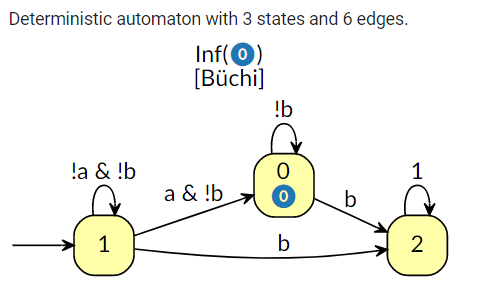

In [19]:
# Define path where to save the generated PNG.
fpath = "/home/ggsolver/examples/models/out/LTLf_Fa_and_G_not_b.png"

# Show PNG in Jupyter Notebook
html = img2html(fpath)
IPython.display.HTML(html)

In [20]:
# Define the components of the DFA
states = [0, 1, 2]
atoms = ["a", "b"]
delta = {
    1: {
        "!a & !b": 1,
        "a & !b": 0,
        "b": 2
    },
    0: {
        "!b": 0,
        "b": 2
    },
    2:{
      "true": 2
    }
}
init_state = 1
final = [0]

# Construct DFA
dfa = DFA(states=states, atoms=atoms, trans_dict=delta, init_state=init_state, final=final)

<div class="alert alert-block alert-warning">
<b>Note:</b> It is necessary to pass keyword arguments!
</div>

That is, a statement like `DFA(states, atoms, delta, init_state, final)` will not construct a correct DFA.


### Functions of Automaton
Now, we can call inbuilt functions of DFA class to know about its properties.


In [21]:
print("Set of states:: dfa.states() = ", dfa.states())
print("Set of atoms:: dfa.atoms() = ", dfa.atoms())
print("Set of symbols (sigma = powerset(atoms):: dfa.sigma() = ", dfa.sigma())
print("Initial state:: dfa.init_state() = ", dfa.init_state())

Set of states:: dfa.states() =  [0, 1, 2]
Set of atoms:: dfa.atoms() =  ['a', 'b']
Set of symbols (sigma = powerset(atoms):: dfa.sigma() =  [(), ('a',), ('b',), ('a', 'b')]
Initial state:: dfa.init_state() =  1


The accepting conditions of `Automaton` class are represented similar to that in spot (https://spot.lrde.epita.fr/).
Hence, for `DFA` which represents a reachability condition, the acceptance condition is defined as `("Reach", 0)` which encodes the condition that $\mathsf{Last}(\rho) \in F$, where $F = \{q \in Q \mid \mathsf{AccSet}(q) = 0\}$.

The following functions enable us to get the acceptance condition and type of arbitrary automaton.


In [22]:
print("Acceptance condition of automaton: ", dfa.acc_cond())
print("Acceptance type of automaton: ", dfa.acc_type())

Acceptance condition of automaton:  ('Reach', 0)
Acceptance type of automaton:  Reach


Each state in every `Automaton` is associated with an acceptance set. By default, any state that is not final is assigned `-1`. Valid acceptance sets are numbered `0, 1, ...`.

`dfa.final(state)` returns the acceptance set of the state.

In [23]:
print("Acceptance sets of each state.")
for st in dfa.states():
    print(st, dfa.final(st))

Acceptance sets of each state.
0 0
1 -1
2 -1


In case of DFA, the following line globs the final states, i.e. the states with acceptance set `0`.

In [24]:
final = [st for st in dfa.states() if dfa.final(st) == 0]
final

[0]

We can check the properties of Automaton as follows.

In [25]:
print("is_deterministic: ", dfa.is_deterministic())
# print("num_acc_sets: ", dfa.num_acc_sets())       # Not implemented in v0.1.3.
# print("is_complete: ", dfa.is_complete())         # Not implemented in v0.1.3.

is_deterministic:  True


Lastly, and most important, we can call the delta function of the automaton, which takes a state and
 set of true atoms generate the next state.

<div class="alert alert-block alert-warning">
<b>Note:</b> Automaton.delta() is a function, not a dictionary.
</div>

In [26]:
# Generate delta.
for st in dfa.states():
    for true_atoms in dfa.sigma():
        print(f"dfa.delta({st}, {true_atoms}) -> {dfa.delta(st, true_atoms)}")

dfa.delta(0, ()) -> 0
dfa.delta(0, ('a',)) -> 0
dfa.delta(0, ('b',)) -> 2
dfa.delta(0, ('a', 'b')) -> 2
dfa.delta(1, ()) -> 1
dfa.delta(1, ('a',)) -> 0
dfa.delta(1, ('b',)) -> 2
dfa.delta(1, ('a', 'b')) -> 2
dfa.delta(2, ()) -> 2
dfa.delta(2, ('a',)) -> 2
dfa.delta(2, ('b',)) -> 2
dfa.delta(2, ('a', 'b')) -> 2
